In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import pandas_datareader.stooq as stooq
from datetime import datetime

In [36]:
ticker = 'AAPL'

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

df_stock = stooq.StooqDailyReader(ticker, start, end).read()

In [37]:
import plotly.graph_objects as go
 
fig = go.Figure(
    data=[go.Candlestick(
        x=df_stock.index, 
        open=df_stock["Open"], 
        high=df_stock["High"], 
        low=df_stock["Low"], 
        close=df_stock["Close"], 
        showlegend=False
    )]
)
fig.update_layout(
    title={"text": ticker},
    yaxis_title='Price',
    xaxis_title="Date",
)
fig.update_xaxes(tickformat='%Y/%m/%d')
fig.update_yaxes(separatethousands=True)
fig.show()

In [32]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-02-03 to 2022-02-04
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    float64
 5   MA 10         242 non-null    float64
 6   MA 20         232 non-null    float64
 7   MA 50         202 non-null    float64
 8   Daily Return  250 non-null    float64
dtypes: float64(9)
memory usage: 19.6 KB


<AxesSubplot: xlabel='Date'>

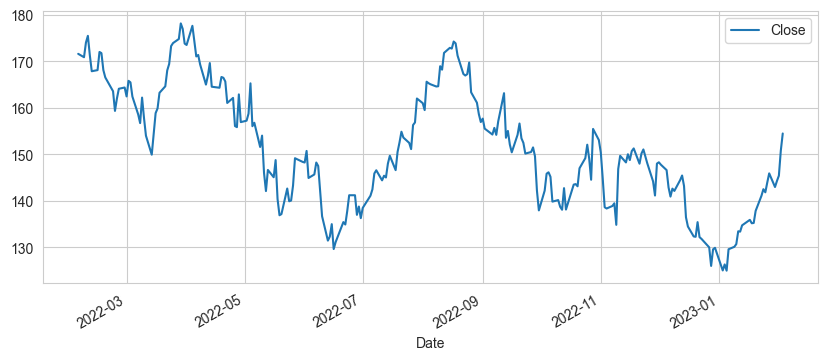

In [4]:
AAPL["Close"].plot(legend=True, figsize=(10,4))

<AxesSubplot: xlabel='Date'>

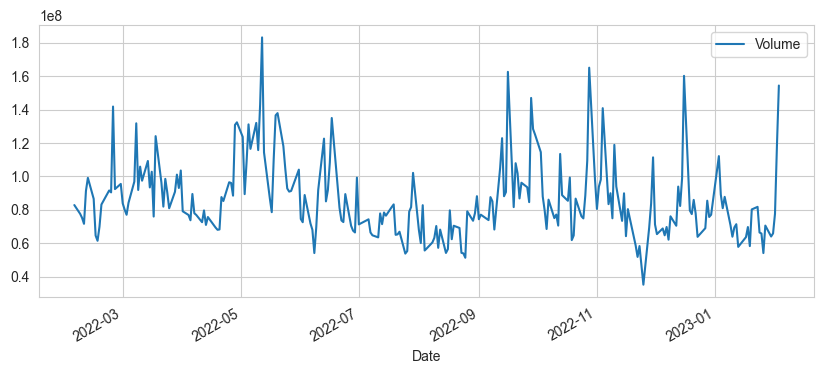

In [5]:
AAPL["Volume"].plot(legend=True, figsize=(10,4))

In [6]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA {ma}"
    AAPL[column_name] = AAPL["Close"].rolling(ma).mean()
AAPL.head(50)

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50
Date,,,,,,,,
2023-02-03,148.030,157.3800,147.830,154.50,154357337.0,NaN,NaN,NaN
2023-02-02,148.900,151.1800,148.170,150.82,118338980.0,NaN,NaN,NaN
2023-02-01,143.970,146.6100,141.320,145.43,77663633.0,NaN,NaN,NaN
2023-01-31,142.700,144.3400,142.280,144.29,65874459.0,NaN,NaN,NaN
2023-01-30,144.955,145.5500,142.850,143.00,64015274.0,NaN,NaN,NaN
2023-01-27,143.155,147.2300,143.080,145.93,70555843.0,NaN,NaN,NaN
2023-01-26,143.170,144.2500,141.900,143.96,54105068.0,NaN,NaN,NaN
2023-01-25,140.890,142.4300,138.810,141.86,65799349.0,NaN,NaN,NaN
2023-01-24,140.305,143.1600,140.300,142.53,66435142.0,NaN,NaN,NaN


<AxesSubplot: xlabel='Date'>

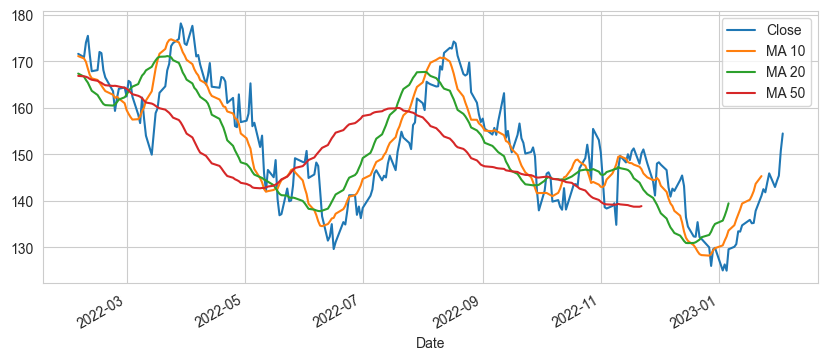

In [7]:
AAPL[["Close", "MA 10", "MA 20", "MA 50"]].plot(subplots=False, figsize=(10,4))

In [8]:
AAPL["Daily Return"] = AAPL["Close"].pct_change()
AAPL.head()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,
2023-02-03,148.030,157.38,147.83,154.50,154357337.0,NaN,NaN,NaN,NaN
2023-02-02,148.900,151.18,148.17,150.82,118338980.0,NaN,NaN,NaN,-0.023819
2023-02-01,143.970,146.61,141.32,145.43,77663633.0,NaN,NaN,NaN,-0.035738
2023-01-31,142.700,144.34,142.28,144.29,65874459.0,NaN,NaN,NaN,-0.007839
2023-01-30,144.955,145.55,142.85,143.00,64015274.0,NaN,NaN,NaN,-0.008940


<AxesSubplot: xlabel='Date'>

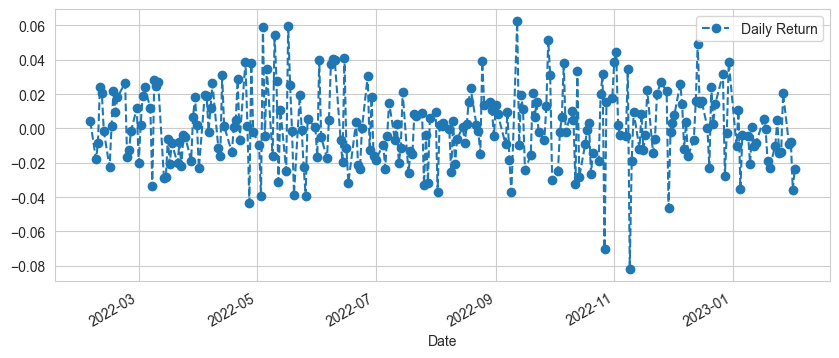

In [9]:
AAPL["Daily Return"].plot(legend=True, figsize=(10,4), linestyle="--", marker="o")

/var/folders/gk/xyj4ps1d5qddnzkkqxmrdxx40000gn/T/ipykernel_85590/394822313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")


<AxesSubplot: xlabel='Daily Return', ylabel='Density'>

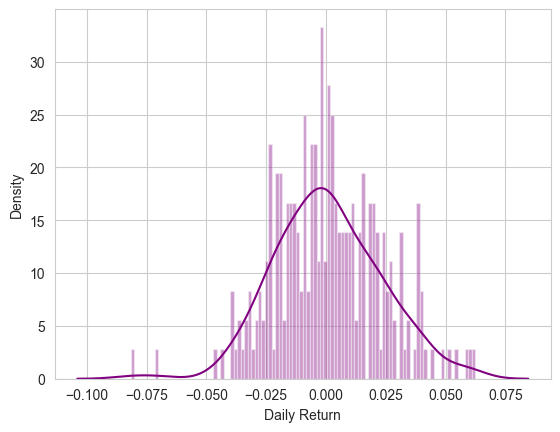

In [10]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")

In [11]:
closing_df = stooq.StooqDailyReader(['AAPL','GOOG','MSFT','AMZN'], start, end).read()["Close"]

In [12]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-02-03,154.50,105.22,258.35,103.39
2023-02-02,150.82,108.80,264.60,112.91
2023-02-01,145.43,101.43,252.75,105.15
2023-01-31,144.29,99.87,247.81,103.13
2023-01-30,143.00,97.95,242.71,100.55


In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-02-03,NaN,NaN,NaN,NaN
2023-02-02,-0.023819,0.034024,0.024192,0.092079
2023-02-01,-0.035738,-0.067739,-0.044785,-0.068727
2023-01-31,-0.007839,-0.015380,-0.019545,-0.019211
2023-01-30,-0.008940,-0.019225,-0.020580,-0.025017


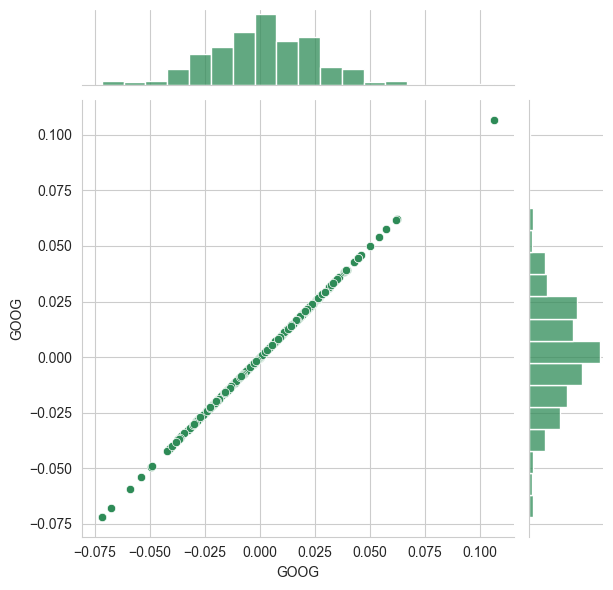

In [14]:
sns.jointplot(x="GOOG", y="GOOG", data=tech_rets, kind="scatter", color="seagreen")

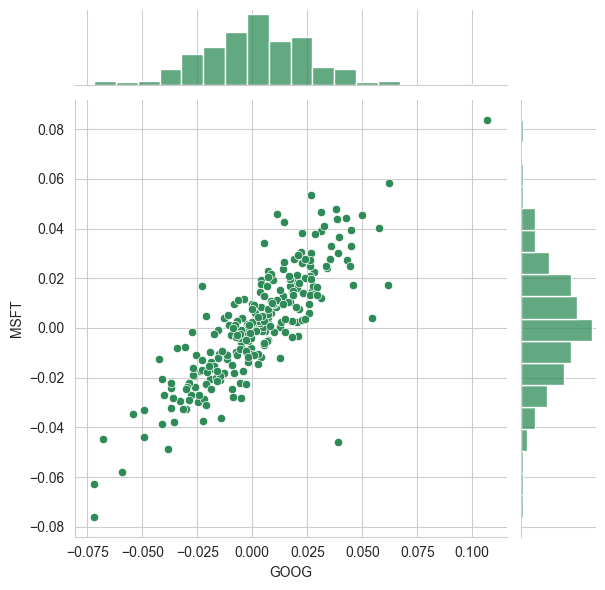

In [15]:
sns.jointplot(x="GOOG", y="MSFT", data=tech_rets, kind="scatter", color="seagreen")

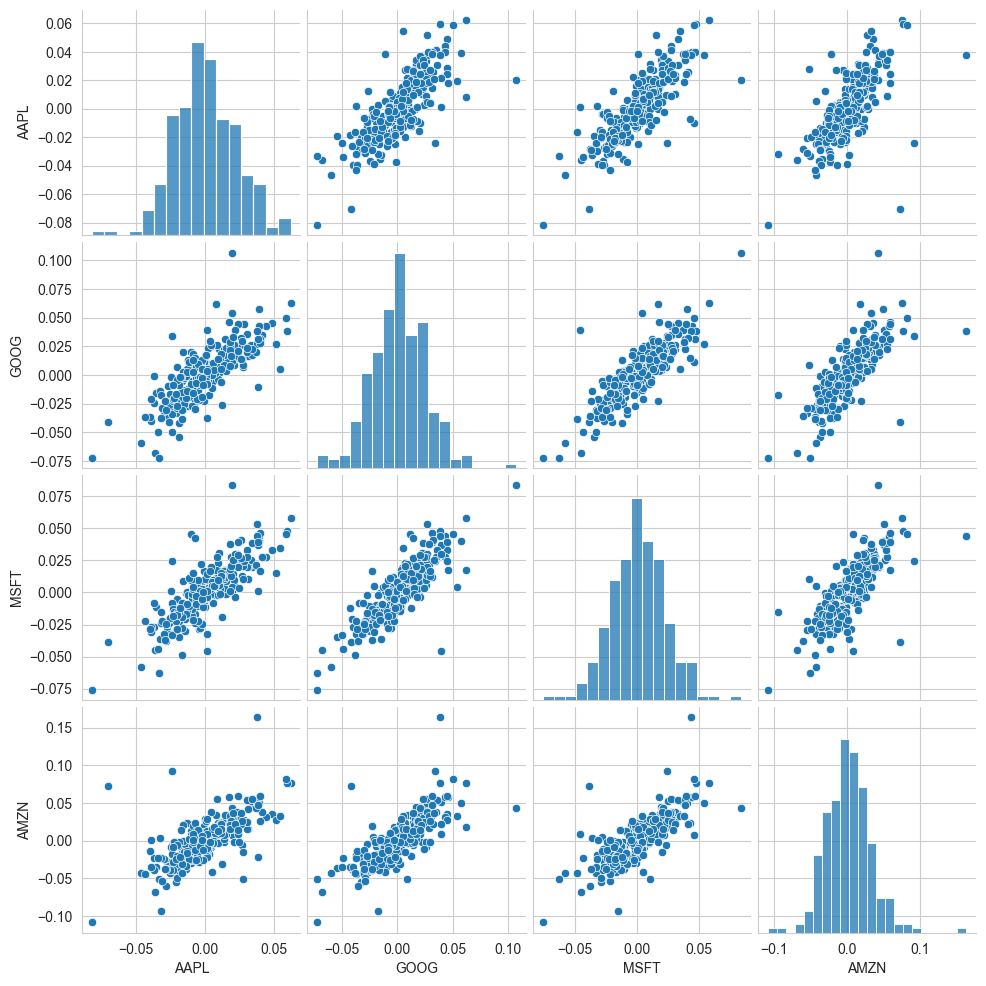

In [16]:
sns.pairplot(tech_rets.dropna())

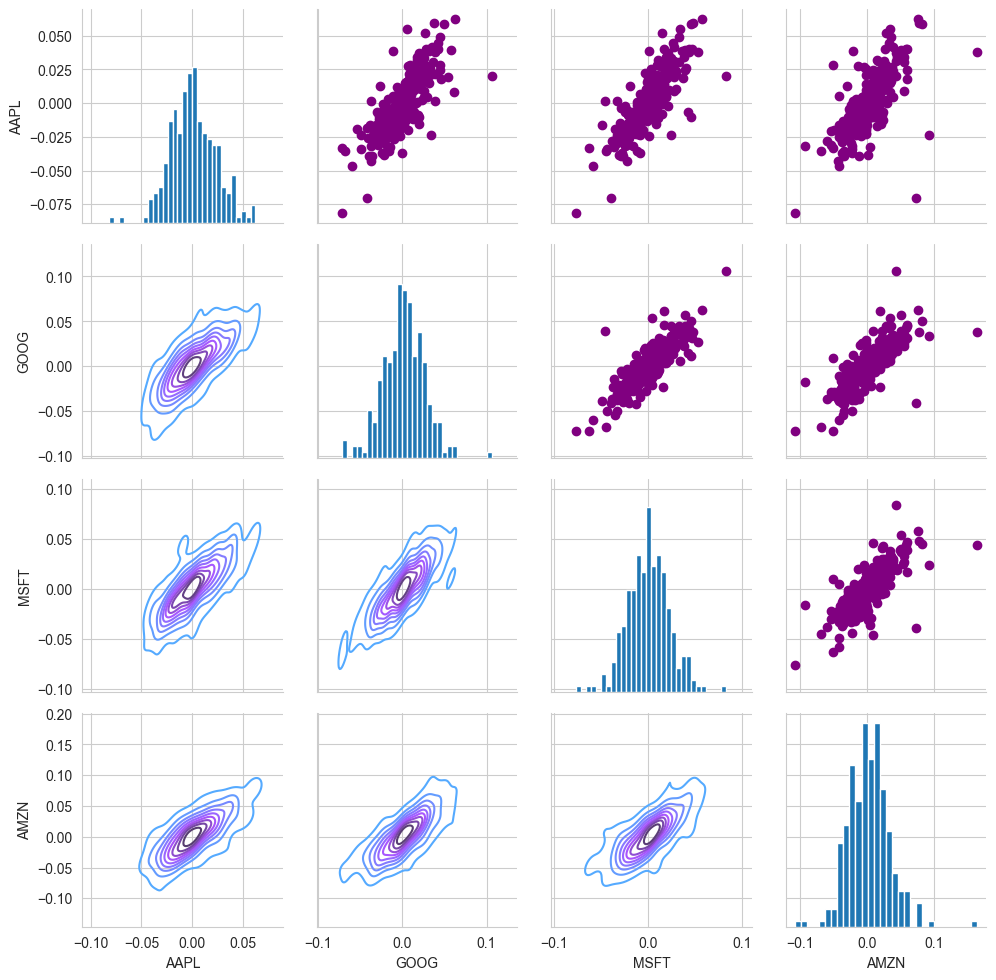

In [17]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

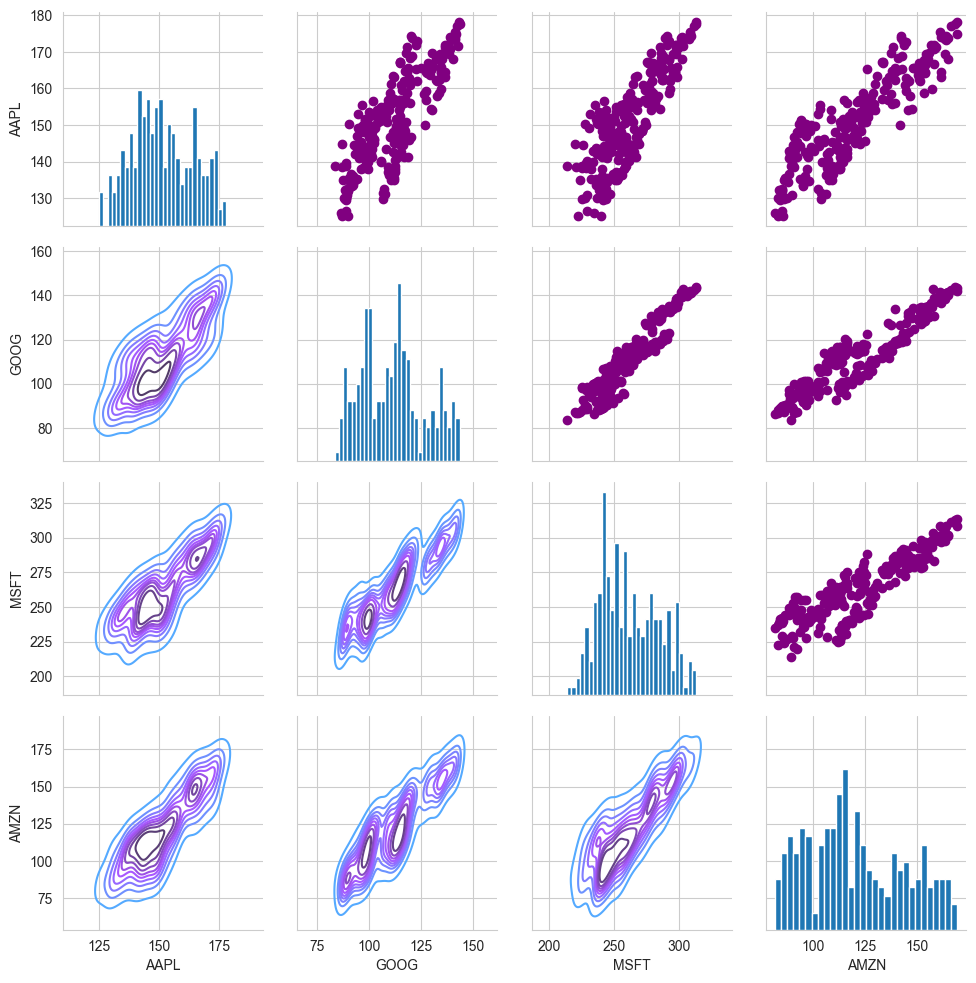

In [18]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

<AxesSubplot: xlabel='Symbols', ylabel='Symbols'>

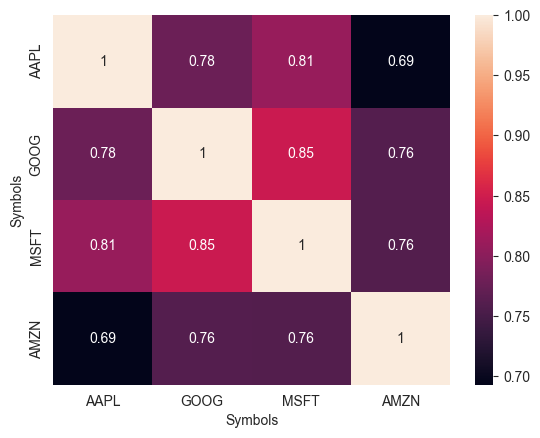

In [19]:
sns.heatmap(tech_rets.corr(), annot=True)

# リスクとリターンの分析

In [20]:
rets = tech_rets.dropna()
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-02-02,-0.023819,0.034024,0.024192,0.092079
2023-02-01,-0.035738,-0.067739,-0.044785,-0.068727
2023-01-31,-0.007839,-0.015380,-0.019545,-0.019211
2023-01-30,-0.008940,-0.019225,-0.020580,-0.025017
2023-01-27,0.020490,0.028178,0.022455,0.016808


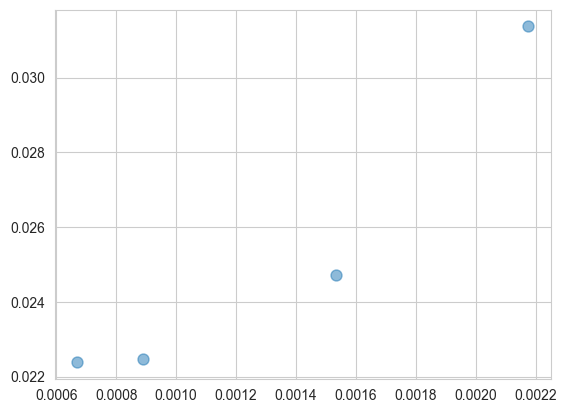

In [21]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

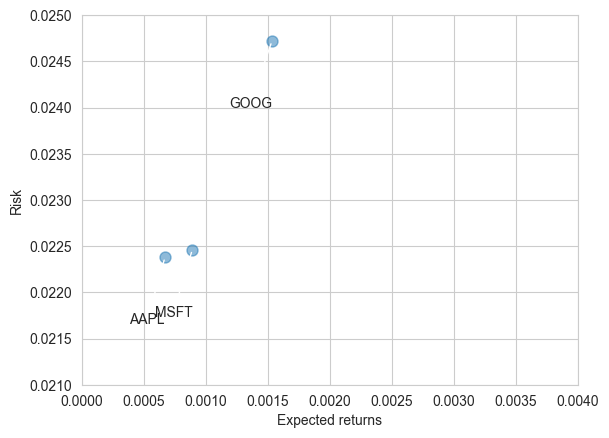

In [22]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.021, 0.025])
plt.xlim([-0.00, 0.004])

plt.xlabel("Expected returns")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(0, -50), 
    textcoords="offset points", 
    ha="right", 
    va="bottom",
     arrowprops= dict(arrowstyle="-",connectionstyle="arc3"))

# バリューアットリスク

/var/folders/gk/xyj4ps1d5qddnzkkqxmrdxx40000gn/T/ipykernel_85590/394822313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")


<AxesSubplot: xlabel='Daily Return', ylabel='Density'>

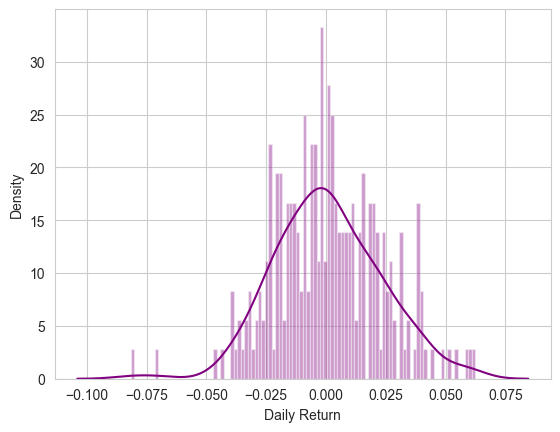

In [23]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")

In [24]:
rets["AAPL"].quantile(0.05)

-0.032841509214545136

In [25]:
days = 365
dt = 1/days
mu = rets.mean()["GOOG"]
sigma = rets.std()["GOOG"]

In [26]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price

In [27]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-03,103.510,108.0200,103.30,105.22,36823421
2023-02-02,106.790,108.8200,106.54,108.80,46622627
2023-02-01,99.740,102.1899,98.42,101.43,26392568
2023-01-31,97.860,99.9100,97.79,99.87,22306778
2023-01-30,98.745,99.4088,97.52,97.95,24365142


Text(0.5, 1.0, 'Monte Carlo Analysis')

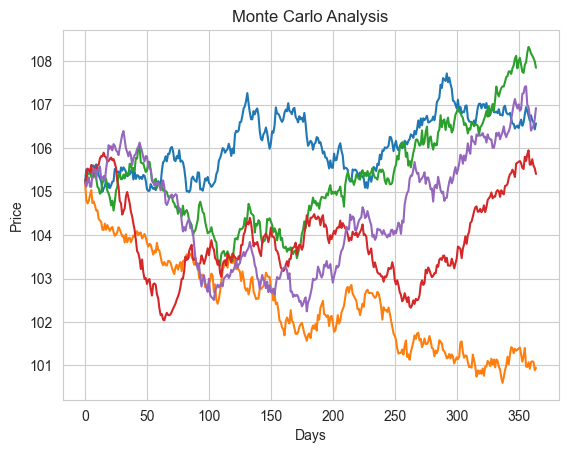

In [28]:
start_price = GOOG.iloc[0,3]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis")

In [29]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]


(array([1., 0., 1., ..., 0., 0., 1.]),
 array([ 96.54465975,  96.64466744,  96.74467513, ..., 116.34618179,
        116.44618948, 116.54619717]),
 <BarContainer object of 200 artists>)

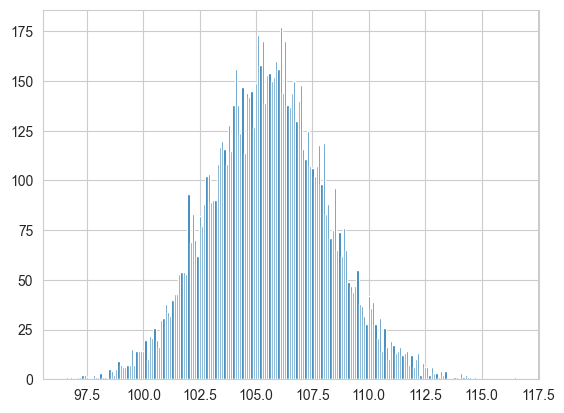

In [30]:
plt.hist(simulations, bins=200)

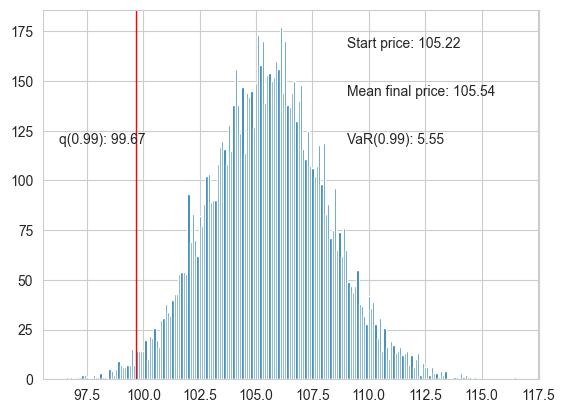

In [31]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s=f"Start price: {start_price:0.2f}")
plt.figtext(0.6, 0.7, s=f"Mean final price: {simulations.mean():0.2f}")
plt.figtext(0.6, 0.6, s=f"VaR(0.99): {(start_price - q):0.2f}")
plt.figtext(0.15, 0.6, s=f"q(0.99): {q:0.2f}")
plt.axvline(x=q, linewidth=1, color="r")
